In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt#注意这里必须是pyplot模块
import seaborn as sns
import math
from scipy import stats

import warnings
warnings.filterwarnings("ignore")
#python通过调用warnings模块中定义的warn()函数来发出警告。我们可以通过警告过滤器进行控制是否发出警告消息，
#注意这里是双引号

%matplotlib inline
#用在Jupyter notebook中具体作用是当你调用matplotlib.pyplot的绘图函数plot()进行绘图的时候，
#或者生成一个figure画布的时候，可以直接在你的python console里面生成图像。

In [3]:
# 下载需要用到的数据集

#如果是离线数据
train_data_file=pd.read_csv("zhengqi_train.txt",sep='\t')#设置读取数据的分隔符，不然混为一谈
test_data_file=pd.read_csv("zhengqi_test.txt",sep='\t')

#注意这里是wget不是wegt
#!wget http://tianchi-media.oss-cn-beijing.aliyuncs.com/DSW/Industrial_Steam_Forecast/zhengqi_test.txt
#作用为下载数据集，使用！wget,得到了如下的100%代表下载成功
#!wget http://tianchi-media.oss-cn-beijing.aliyuncs.com/DSW/Industrial_Steam_Forecast/zhengqi_train.txt

In [4]:
#train_data_file = "./zhengqi_train.txt"#设定训练集
#test_data_file =  "./zhengqi_test.txt"#设定测试数据集，此时还没有读入数据

#train_data = pd.read_csv(train_data_file, sep='\t', encoding='utf-8')#读入数据，参数有sep(分隔），以及编码
#test_data = pd.read_csv(test_data_file, sep='\t', encoding='utf-8')

ValueError: Invalid file path or buffer object type: <class 'pandas.core.frame.DataFrame'>

In [ ]:
train_data.info()#通过info()来了解数据每列的type，有助于了解是否存在除了nan以外的特殊符号异常。

In [ ]:
test_data.info()#训练数据以及测试数据都要观测

In [ ]:
train_data.describe()

In [ ]:
test_data.describe()

In [5]:
train_data.head()

NameError: name 'train_data' is not defined

In [6]:
test_data.head()

NameError: name 'test_data' is not defined

In [19]:
#记忆一下怎么设置图片大小
fig = plt.figure(figsize=(4, 6))  # 指定绘图对象宽度和高度

#做模型时，经常使用箱型图查看特征变量有没有异常值
#boxplot是位于sns里面，并且选取dataframe里面的数据直接按照【】选取
#记忆以下里面的关键字,orient
#对于里面width的数据因为其为整数没有双引号
#orient="v"表示其为垂直方向，width=0.5 控制箱型图的宽度
sns.boxplot(train_data['V0'],orient="v", width=0.5)#做模型时，经常使用箱型图查看特征变量有没有异常值

NameError: name 'train_data' is not defined

<Figure size 288x432 with 0 Axes>

In [8]:
# 画箱式图
#train_data.columns读取dataframe的所有列
#注意所有列用[:39]不用输入target列
column = train_data.columns[:39]  # 列表头#这里加不加tolist都可以,tolist就是将其转化为列表。


fig = plt.figure(figsize=(20, 40))  # 指定绘图对象宽度和高度
for i in range(38):#这里是循环38次，所以说应该是range
    plt.subplot(13, 3, i + 1)  # 13行3列子图#13行3列的第i+1个图，从左到右层序遍历
    sns.boxplot(train_data[column[i]], orient="v", width=0.5)  # 箱式图
    plt.ylabel(column[i], fontsize=8)#注意这里的y_label也是（）,ylabel而非y_label，因为是调入模块，没有等号
plt.show()

NameError: name 'train_data' is not defined

NameError: name 'train_data' is not defined

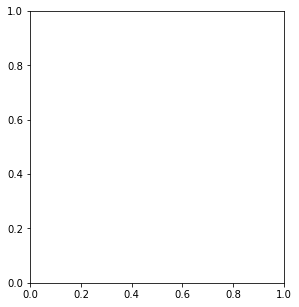

In [9]:
plt.figure(figsize=(10,5))

ax=plt.subplot(1,2,1)
#sns.distplot()集合了matplotlib的hist()于sns.kdeplot()功能，
#增了rugplot分布观测显示与理由scipy库fit拟合参数分布的新颖用途。

#直方图一般用于数字特征（连续型）多用于y值和数字（连续型）特征的分布画图
#seaborn集合了kdeplot的KDE核密度估计：在每一个观测点附近近似正态分布，再将所有的点的正态分布结合起来。
#如果没有了kde则没有了凸图线的拟合
#fit为拟合的参数,Scipy的stats模块包含了多种概率分布的随机变量，随机变量分为连续和离散两种
#记忆其拟合的方式
sns.distplot(train_data['V0'],fit=stats.gamma)#train_data['V0']选取了数据V0列
ax=plt.subplot(1,2,2)

#这是一种检验样本数据概率分布(例如正态分布)的方法。默认是正态分布，当然可以修改分布。
#红色线为标准正态分布
res = stats.probplot(train_data['V0'], plot=plt)#proplot又叫QQ图

In [ ]:
train_cols = 6
train_rows = len(train_data.columns)
plt.figure(figsize=(4*train_cols,4*train_rows))#这里的图片构造也得学会，怎么才能不会让图片很挤

i=0
for col in train_data.columns:#这里的col是随机的吗？#这里必须使用col和i同时，不然会造成混乱
    i+=1
    ax=plt.subplot(train_rows,train_cols,i)
    sns.distplot(train_data[col],fit=stats.norm)#因为这里是索引，所以必须使用[]
    
    i+=1
    ax=plt.subplot(train_rows,train_cols,i)
    res = stats.probplot(train_data[col], plot=plt)
plt.show()

In [ ]:
ax = sns.kdeplot(train_data['V0'], color="Red", shade=True)
#这里也可以画distplot，因为里面集成了KDE模块。也可以直接kdeplot
#这里的shade参数是阴影填充。

ax = sns.kdeplot(test_data['V0'], color="Blue", shade=True)#学会如何设置颜色和阴影
#注意这里true关键词，T一定要大写
ax.set_xlabel('V0')
ax.set_ylabel("Frequency")
ax = ax.legend(["train","test"])
#注意这里可以不用写ax=？，直接使用plt.legend更方便，并且这里的图里相当于索引一样在【】里面

In [10]:
dist_cols = 6
dist_rows = len(test_data.columns)
plt.figure(figsize=(4*dist_cols,4*dist_rows))
#先设置画面以及subplot的大小，再进行循环
#train_data.columns返回的是列标签的索引列表
i=1
for col in test_data.columns:
    #因为训练数据比测试数据多了target标签，因此以test为标准，当然也可以使用drop删除一个标签
    ax=plt.subplot(dist_rows,dist_cols,i)
    #在实行具体的循环代码时应该指明其是在哪个plot里面画
    ax = sns.kdeplot(train_data[col], color="Red", shade=True)
    #这里可以使用col作为索引原因是col本身具有了列的性质，不能用数字作为索引
    ax = sns.kdeplot(test_data[col], color="Blue", shade=True)
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    ax = ax.legend(["train","test"])
    
    i+=1
plt.show()

NameError: name 'test_data' is not defined

NameError: name 'train_data' is not defined

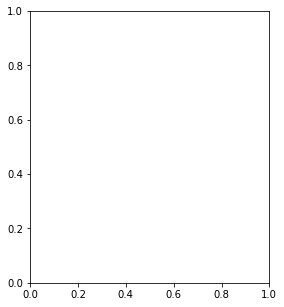

In [11]:
drop_col = 6
drop_row = 1

plt.figure(figsize=(5*drop_col,5*drop_row))###这个就是每个图分配5个单位大小，有drop_col行，drop_row列

i=1
for col in ["V5","V9","V11","V17","V22","V28"]:
    ax =plt.subplot(drop_row,drop_col,i)
    ax = sns.kdeplot(train_data[col], color="Red", shade=True)
    ax = sns.kdeplot(test_data[col], color="Blue", shade=True)
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    ax = ax.legend(["train","test"])
    
    i+=1
plt.show()

In [ ]:
##泛化能力（generalization ability）是指机器学习算法对新鲜样本的适应能力。 
#学习的目的是学到隐含在数据背后的规律，对具有同一规律的学习集以外的数据，
#经过训练的网络也能给出合适的输出，该能力称为泛化能力。

##以上的特征回导致模型的泛化能力减弱。因为测试集和训练集数据分布不一样。
drop_columns = ['V5','V9','V11','V17','V22','V28']

In [12]:
#合并训练集和测试集数据，并可视化训练集和测试集数据特征分布图

NameError: name 'train_data' is not defined

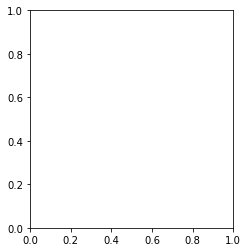

In [13]:
fcols = 2
frows = 1

plt.figure(figsize=(8,4))

ax=plt.subplot(1,2,1)
sns.regplot(x='V0', y='target', data=train_data, ax=ax, 
            scatter_kws={'marker':'.','s':3,'alpha':0.3},#注意这里可以使用scatter_kws设置参数使用字典形式设置
            line_kws={'color':'k'});
plt.xlabel('V0')
plt.ylabel('target')

ax=plt.subplot(1,2,2)
sns.distplot(train_data['V0'].dropna())
plt.xlabel('V0')

plt.show()

In [ ]:
fcols = 6
frows = len(test_data.columns)
plt.figure(figsize=(5*fcols,4*frows))

i=0
for col in test_data.columns:#注意这里是testdata的数据可以免除target数据的影响
    i+=1
    ax=plt.subplot(frows,fcols,i)
    sns.regplot(x=col, y='target', data=train_data, ax=ax, 
                scatter_kws={'marker':'.','s':3,'alpha':0.3},
                line_kws={'color':'k'});
    plt.xlabel(col)
    plt.ylabel('target')
    
    i+=1
    ax=plt.subplot(frows,fcols,i)
    sns.distplot(train_data[col].dropna())
    plt.xlabel(col)

In [ ]:
data_train1 = train_data.drop(['V5','V9','V11','V17','V22','V28'],axis=1)
#这里最好加上axis为1
#注意这里是直接train_data.drop，没有train_data.columns.drop
train_corr = data_train1.corr()#这里出来的直接就是二维的矩阵形式
train_corr

In [ ]:
# 画出相关性热力图
ax = plt.subplots(figsize=(20, 16))#调整画布大小

ax = sns.heatmap(train_corr, vmax=.8, square=True, annot=True)#画热力图   annot=True 显示系数
#这里的vmax主要作用是设置热力图数值上限

In [ ]:
# 找出相关程度
data_train1 = train_data.drop(['V5','V9','V11','V17','V22','V28'],axis=1)

plt.figure(figsize=(20, 16))  # 指定绘图对象宽度和高度
colnm = data_train1.columns.tolist()  # 列表头
mcorr = data_train1[colnm].corr(method="spearman")  # 相关系数矩阵，即给出了任意两个变量之间的相关系数
mask = np.zeros_like(mcorr, dtype=np.bool)  # 构造与mcorr同维数矩阵 为bool型
mask[np.triu_indices_from(mask)] = True  # 角分线右侧为True
cmap = sns.diverging_palette(220, 10, as_cmap=True)  # 返回matplotlib colormap对象
g = sns.heatmap(mcorr, mask=mask, cmap=cmap, square=True, annot=True, fmt='0.2f')  # 热力图（看两两相似度）
plt.show()

In [ ]:
#寻找K个最相关的特征信息
k = 10 # number of variables for heatmap
cols = train_corr.nlargest(k, 'target')['target'].index
#这里就是找到k个与target相关性最大的特征变量并返回索引

cm = np.corrcoef(train_data[cols].values.T)
hm = plt.subplots(figsize=(10, 10))#调整画布大小
#hm = sns.heatmap(cm, cbar=True, annot=True, square=True)
#g = sns.heatmap(train_data[cols].corr(),annot=True,square=True,cmap="RdYlGn")
hm = sns.heatmap(train_data[cols].corr(),annot=True,square=True)
#这里的cmap是他的一个配色方案，当然也可以用默认的

plt.show()

In [14]:
threshold = 0.5

corrmat = train_data.corr()
top_corr_features = corrmat.index[abs(corrmat["target"])>threshold]
plt.figure(figsize=(10,10))
g = sns.heatmap(train_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")


NameError: name 'train_data' is not defined

In [ ]:
drop_columns.clear()
drop_columns = ['V5','V9','V11','V17','V22','V28']

In [ ]:
# Threshold for removing correlated variables
threshold = 0.5

# Absolute value correlation matrix
corr_matrix = data_train1.corr().abs()
drop_col=corr_matrix[corr_matrix["target"]<threshold].index
#data_all.drop(drop_col, axis=1, inplace=True)

In [15]:
#merge train_set and test_set
train_x =  train_data.drop(['target'], axis=1)

#data_all=pd.concat([train_data,test_data],axis=0,ignore_index=True)
data_all = pd.concat([train_x,test_data]) #注意这里结合是在一个方括号里面的


data_all.drop(drop_columns,axis=1,inplace=True)
#View data
data_all.head()

NameError: name 'train_data' is not defined

In [ ]:
# normalise numeric columns
#进行普通化的时候应该将训练与测试数据一起捆绑再普通化
cols_numeric=list(data_all.columns)

def scale_minmax(col):
    return (col-col.min())/(col.max()-col.min())
#all_data里面的每一列都应用这种变换，目的是普通化
data_all[cols_numeric] = data_all[cols_numeric].apply(scale_minmax,axis=0)
#这里为什么应用到行？
data_all[cols_numeric].describe()

In [ ]:
#col_data_process = cols_numeric.append('target')
train_data_process = train_data[cols_numeric]
train_data_process = train_data_process[cols_numeric].apply(scale_minmax,axis=0)

test_data_process = test_data[cols_numeric]#注意这里test_data是不含有target的特征变量的
test_data_process = test_data_process[cols_numeric].apply(scale_minmax,axis=0)


In [16]:
cols_numeric_left = cols_numeric[0:13]
cols_numeric_right = cols_numeric[13:]

NameError: name 'cols_numeric' is not defined

In [ ]:
## Check effect of Box-Cox transforms on distributions of continuous variables

train_data_process = pd.concat([train_data_process, train_data['target']], axis=1)

fcols = 6
frows = len(cols_numeric_left)
plt.figure(figsize=(4*fcols,4*frows))
i=0

for var in cols_numeric_left:
    dat = train_data_process[[var, 'target']].dropna()
        
    i+=1
    plt.subplot(frows,fcols,i)
    sns.distplot(dat[var] , fit=stats.norm);
    plt.title(var+' Original')
    plt.xlabel('')
        
    i+=1
    plt.subplot(frows,fcols,i)
    _=stats.probplot(dat[var], plot=plt)
    plt.title('skew='+'{:.4f}'.format(stats.skew(dat[var])))
    plt.xlabel('')
    plt.ylabel('')
        
    i+=1
    plt.subplot(frows,fcols,i)
    plt.plot(dat[var], dat['target'],'.',alpha=0.5)
    plt.title('corr='+'{:.2f}'.format(np.corrcoef(dat[var], dat['target'])[0][1]))
 
    i+=1
    plt.subplot(frows,fcols,i)
    trans_var, lambda_var = stats.boxcox(dat[var].dropna()+1)#这里使用boxcox进行变换，但是必须让值非负
    trans_var = scale_minmax(trans_var)      
    sns.distplot(trans_var , fit=stats.norm);#这里就是使用的trans_var，而非trans_var【】此时为元组
    plt.title(var+' Tramsformed')
    plt.xlabel('')
        
    i+=1
    plt.subplot(frows,fcols,i)
    _=stats.probplot(trans_var, plot=plt)
    plt.title('skew='+'{:.4f}'.format(stats.skew(trans_var)))
    plt.xlabel('')
    plt.ylabel('')
        
    i+=1
    plt.subplot(frows,fcols,i)
    plt.plot(trans_var, dat['target'],'.',alpha=0.5)#注意这里直接使用的没有变换过的target
    plt.title('corr='+'{:.2f}'.format(np.corrcoef(trans_var,dat['target'])[0][1]))

In [17]:
## Check effect of Box-Cox transforms on distributions of continuous variables


fcols = 6
frows = len(cols_numeric_right)
plt.figure(figsize=(4*fcols,4*frows))
i=0

for var in cols_numeric_right:
    dat = train_data_process[[var, 'target']].dropna()
        
    i+=1
    plt.subplot(frows,fcols,i)
    sns.distplot(dat[var] , fit=stats.norm);
    plt.title(var+' Original')
    plt.xlabel('')
        
    i+=1
    plt.subplot(frows,fcols,i)
    _=stats.probplot(dat[var], plot=plt)
    plt.title('skew='+'{:.4f}'.format(stats.skew(dat[var])))
    plt.xlabel('')
    plt.ylabel('')
        
    i+=1
    plt.subplot(frows,fcols,i)
    plt.plot(dat[var], dat['target'],'.',alpha=0.5)
    plt.title('corr='+'{:.2f}'.format(np.corrcoef(dat[var], dat['target'])[0][1]))
 
    i+=1
    plt.subplot(frows,fcols,i)
    trans_var, lambda_var = stats.boxcox(dat[var].dropna()+1)
    trans_var = scale_minmax(trans_var)      
    sns.distplot(trans_var , fit=stats.norm);
    plt.title(var+' Tramsformed')
    plt.xlabel('')
        
    i+=1
    plt.subplot(frows,fcols,i)
    _=stats.probplot(trans_var, plot=plt)
    plt.title('skew='+'{:.4f}'.format(stats.skew(trans_var)))
    plt.xlabel('')
    plt.ylabel('')
        
    i+=1
    plt.subplot(frows,fcols,i)
    plt.plot(trans_var, dat['target'],'.',alpha=0.5)
    plt.title('corr='+'{:.2f}'.format(np.corrcoef(trans_var,dat['target'])[0][1]))

NameError: name 'cols_numeric_right' is not defined